# Data Preparation

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.axes as axes

In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('out/result_v4_20240604_193154.csv')
df

,payload_rate,threshold,index_signal,secret_name,len_secret_data,len_extracted_secret_data,ncc,prd,snr,time
0,1,0,0,secret_0.99_bps,3564,3105,0.999993,0.182637,54.768219,0.016502
1,1,0,0,secret_0.66_bps,2376,2376,0.999994,0.156707,56.098214,0.012484
2,1,0,0,secret_0.51_bps,1836,1836,0.999996,0.141306,56.996816,0.009630
3,1,0,0,secret_0.48_bps,1728,1728,0.999996,0.137666,57.223456,0.009056
4,1,0,0,secret_0.39_bps,1404,1404,0.999997,0.121768,58.289356,0.007384
...,...,...,...,...,...,...,...,...,...,...
6619,4,3,45,secret_0.39_bps,1404,1404,0.999965,0.809165,41.839259,0.002649
6620,4,3,45,secret_0.32_bps,1152,1152,0.999970,0.741054,42.602998,0.002185
6621,4,3,45,secret_0.21_bps,756,756,0.999985,0.519121,45.694629,0.001418
6622,4,3,45,secret_0.15_bps,540,540,0.999981,0.587092,44.625870,0.001041


In [3]:
# Get secret bps as a number
df['secret_bps'] = df['secret_name'].apply(lambda x: float(x[7:11]))
df.head()

,payload_rate,threshold,index_signal,secret_name,len_secret_data,len_extracted_secret_data,ncc,prd,snr,time,secret_bps
0,1,0,0,secret_0.99_bps,3564,3105,0.999993,0.182637,54.768219,0.016502,0.99
1,1,0,0,secret_0.66_bps,2376,2376,0.999994,0.156707,56.098214,0.012484,0.66
2,1,0,0,secret_0.51_bps,1836,1836,0.999996,0.141306,56.996816,0.009630,0.51
3,1,0,0,secret_0.48_bps,1728,1728,0.999996,0.137666,57.223456,0.009056,0.48
4,1,0,0,secret_0.39_bps,1404,1404,0.999997,0.121768,58.289356,0.007384,0.39


In [4]:
# Get df with df['payload_rate'] + df['threshold'] is 1 to 4 inclusive
df = df[(df['payload_rate'] + df['threshold'] >= 1) & (df['payload_rate'] + df['threshold'] <= 4)]
df.head()

,payload_rate,threshold,index_signal,secret_name,len_secret_data,len_extracted_secret_data,ncc,prd,snr,time,secret_bps
0,1,0,0,secret_0.99_bps,3564,3105,0.999993,0.182637,54.768219,0.016502,0.99
1,1,0,0,secret_0.66_bps,2376,2376,0.999994,0.156707,56.098214,0.012484,0.66
2,1,0,0,secret_0.51_bps,1836,1836,0.999996,0.141306,56.996816,0.009630,0.51
3,1,0,0,secret_0.48_bps,1728,1728,0.999996,0.137666,57.223456,0.009056,0.48
4,1,0,0,secret_0.39_bps,1404,1404,0.999997,0.121768,58.289356,0.007384,0.39


In [5]:
df.columns

Index(['payload_rate', 'threshold', 'index_signal', 'secret_name',
       'len_secret_data', 'len_extracted_secret_data', 'ncc', 'prd', 'snr',
       'time', 'secret_bps'],
      dtype='object')

# Create Graph

In [6]:
filtered_df = df[(df['payload_rate'] == 1) & (df['threshold'] == 1)][[
    'secret_bps', 'index_signal', 'ncc', 'prd', 'snr', 'time']].sort_values(by=['secret_bps'])
filtered_df.head()

,secret_bps,index_signal,ncc,prd,snr,time
620,0.08,22,0.999999,0.092356,60.690729,0.000798
629,0.08,23,0.999999,0.102147,59.815495,0.000739
611,0.08,21,1.000000,0.052899,65.531130,0.000835
602,0.08,20,1.000000,0.027597,71.182645,0.000858
593,0.08,19,1.000000,0.024109,72.356583,0.000774


Graph by ML with y: secret_bps and line: model_name

In [7]:
mean_by_snr = filtered_df.groupby(
    ['secret_bps'])['snr'].mean()
new_mean_by_snr = mean_by_snr.reset_index()
new_mean_by_snr

,secret_bps,snr
0,0.08,65.866067
1,0.15,63.079885
2,0.21,61.632796
3,0.32,59.878151
4,0.39,58.964644
5,0.48,58.008797
6,0.51,57.767247
7,0.66,56.716387
8,0.99,54.927125


In [8]:
filtered_df = df.copy()
filtered_df['pr_n_t'] = filtered_df.apply(lambda row: row['threshold'] + row['payload_rate'], axis=1)
filtered_df = filtered_df[[
    'pr_n_t', 'secret_bps', 'index_signal', 'ncc', 'prd', 'snr', 'time']].sort_values(by=['pr_n_t', 'secret_bps'])
filtered_df.head()

,pr_n_t,secret_bps,index_signal,ncc,prd,snr,time
8,1,0.08,0,0.999999,0.053437,65.443199,0.001454
17,1,0.08,1,1.000000,0.052316,65.627334,0.001567
26,1,0.08,2,1.000000,0.049714,66.070485,0.001496
35,1,0.08,3,1.000000,0.050462,65.940713,0.001440
44,1,0.08,4,1.000000,0.045220,66.893435,0.001408


In [9]:
# marker code from matplotlib in array
markers = ['o', 'v', 's', 'p', 'D', 'P', 'X', 'd', '+', 'x', '|', '_']

In [10]:
# Read the CSV file into a DataFrame
v3_pr_n_t_df = pd.read_csv('out/v3_pr_n_t_snr.csv')
v3_pr_n_t_df

,pr_n_t,secret_bps,snr
0,1,0.08,67.531444
1,1,0.15,64.821668
2,1,0.21,63.323968
3,1,0.32,61.520853
4,1,0.39,60.648681
5,1,0.48,59.723325
6,1,0.51,59.445409
7,1,0.66,58.389635
8,1,0.99,57.282458
9,2,0.08,63.915252


In [11]:
# Read the CSV file into a DataFrame
siddarth_df = pd.read_csv('out/siddarth.csv')
siddarth_df

,secret_bps,snr
0,0.084,47.23
1,0.150,44.51
2,0.210,42.96
3,0.320,40.36
4,0.390,38.97
5,0.480,37.55
6,0.510,37.13
7,0.660,34.18
8,0.990,30.04


In [12]:
def generate_graph_by_x_secret_bps_line_pr_n_t(axs: axes.Axes, dataframe: pd.DataFrame, parameter: str):
    mean_by_parameter = dataframe.groupby(
        ['pr_n_t', 'secret_bps'])['snr'].mean()
    print('snr')

    new_mean_by_parameter = mean_by_parameter.reset_index()
    print(new_mean_by_parameter.groupby('pr_n_t')['snr'].mean().reset_index().to_string())
    print(new_mean_by_parameter.to_string())

    # Group by v3
    i = 0
    grouped_v3_df = v3_pr_n_t_df.groupby('pr_n_t')
    print(grouped_v3_df[
          'snr'].mean().reset_index().to_string())
    for name, group in grouped_v3_df:
        axs.plot(group['secret_bps'], group['snr'], color='blue', linewidth=2)
        axs.scatter(group['secret_bps'], group['snr'],
                    marker=markers[i], label=f'Gautama and Ahmad [30]-max={name}', s=100, color='blue')
        i += 1
    
    axs.plot(siddarth_df['secret_bps'],
             siddarth_df['snr'], color='red', linewidth=2)
    axs.scatter(siddarth_df['secret_bps'], siddarth_df['snr'],
                marker=markers[i], label=f'Bhalerao et.al. [14]', s=100, color='red') 
    i += 1

    # Group data by 'pr_n_t'
    grouped_df = new_mean_by_parameter.groupby('pr_n_t')

    # Plot line chart
    for name, group in grouped_df:
        axs.plot(group['secret_bps'], group['snr'],
                 color='orange', linewidth=2)
        axs.scatter(group['secret_bps'], group['snr'],
                    marker=markers[i], label=f'Proposed Method-max={name}', s=100, color='orange')
        i += 1

    axs.grid()
    axs.set_xlabel('BPS', fontsize=18)
    axs.set_ylabel(parameter.upper(), fontsize=18)
    axs.set_title(f'Average SNR by Max Sample Bits', fontsize=20)
    axs.tick_params(axis='both', labelsize=18)

snr
   pr_n_t        snr
0       1  61.401119
1       2  59.649011
2       3  56.580309
3       4  54.058315
    pr_n_t  secret_bps        snr
0        1        0.08  67.812272
1        1        0.15  64.644030
2        1        0.21  63.340692
3        1        0.32  61.657058
4        1        0.39  60.658430
5        1        0.48  59.592530
6        1        0.51  59.365890
7        1        0.66  58.467288
8        1        0.99  57.071884
9        2        0.08  65.866067
10       2        0.15  63.079885
11       2        0.21  61.632796
12       2        0.32  59.878151
13       2        0.39  58.964644
14       2        0.48  58.008797
15       2        0.51  57.767247
16       2        0.66  56.716387
17       2        0.99  54.927125
18       3        0.08  62.881699
19       3        0.15  60.128232
20       3        0.21  58.527618
21       3        0.32  56.618038
22       3        0.39  55.876853
23       3        0.48  54.985409
24       3        0.51  54.801266
25     

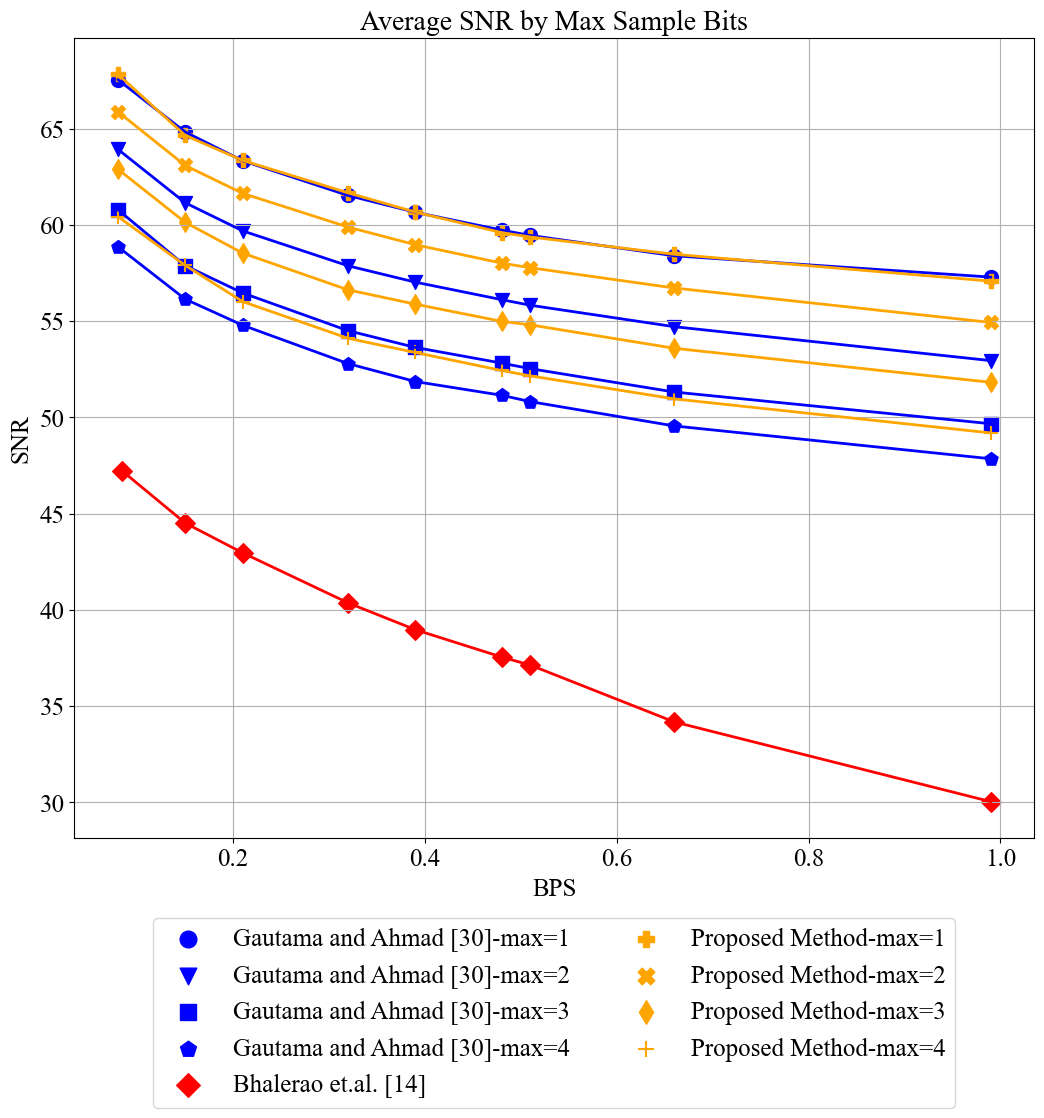

In [13]:
plt.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure(figsize=(12, 10))
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
gs = gridspec.GridSpec(1, 1, figure=fig)
gs.update(wspace=0.5)

ax_a = plt.subplot(gs[0, :1])

generate_graph_by_x_secret_bps_line_pr_n_t(
    ax_a, filtered_df, 'SNR')

ax_a.legend(fontsize=18, loc='upper center', markerscale=1.2,
            bbox_to_anchor=(0.5, -0.1), borderaxespad=0., ncol=2)
plt.savefig('out/v4_out_check.png', dpi=300)
plt.show()

# Maximum Capacity

In [14]:
# Read the CSV file into a DataFrame
max_df = pd.read_csv('out/result_v4_2_20240725_095923.csv')
max_df

,payload_rate,threshold,index_signal,secret_name,len_secret_data,len_extracted_secret_data,ncc,prd,snr,time
0,1,0,0,secret,100000,3116,0.999985,0.256727,51.810562,0.172017
1,1,0,1,secret,100000,3175,0.999989,0.253710,51.913235,0.184014
2,1,0,2,secret,100000,3113,0.999996,0.238725,52.442031,0.198021
3,1,0,3,secret,100000,3178,0.999995,0.244836,52.222512,0.200246
4,1,0,4,secret,100000,3290,0.999997,0.223233,53.024814,0.167226
...,...,...,...,...,...,...,...,...,...,...
271,3,1,41,secret,100000,7350,0.999961,0.693971,43.173177,0.156402
272,3,1,42,secret,100000,7248,0.999942,1.025603,39.780415,0.158810
273,3,1,43,secret,100000,8986,0.999404,1.796566,34.911137,0.158026
274,3,1,44,secret,100000,7644,0.999983,0.542721,45.308460,0.162009


In [15]:
max_df['pr_n_t'] = max_df.apply(
    lambda row: row['threshold'] + row['payload_rate'], axis=1)
mean_by_snr = max_df.groupby(
    ['pr_n_t'])['len_extracted_secret_data'].mean().reset_index()

mean_by_snr['bps'] = mean_by_snr['len_extracted_secret_data'] / 3600
mean_by_snr.head()

,pr_n_t,len_extracted_secret_data,bps
0,1,3167.260870,0.879795
1,2,5936.956522,1.649155
2,3,7807.347826,2.168708
3,4,8622.304348,2.395085


## Speed

In [16]:
print(df.head())
print(df.columns)

   payload_rate  threshold  index_signal      secret_name  len_secret_data  \
0             1          0             0  secret_0.99_bps             3564   
1             1          0             0  secret_0.66_bps             2376   
2             1          0             0  secret_0.51_bps             1836   
3             1          0             0  secret_0.48_bps             1728   
4             1          0             0  secret_0.39_bps             1404   

   len_extracted_secret_data       ncc       prd        snr      time  \
0                       3105  0.999993  0.182637  54.768219  0.016502   
1                       2376  0.999994  0.156707  56.098214  0.012484   
2                       1836  0.999996  0.141306  56.996816  0.009630   
3                       1728  0.999996  0.137666  57.223456  0.009056   
4                       1404  0.999997  0.121768  58.289356  0.007384   

   secret_bps  
0        0.99  
1        0.66  
2        0.51  
3        0.48  
4        0.3

In [17]:
filtered_df = df.copy()
filtered_df['pr_n_t'] = df.apply(
    lambda row: row['threshold'] + row['payload_rate'], axis=1)
mean_by_time = filtered_df[filtered_df['pr_n_t'] == 2].groupby(
    ['model_name', 'secret_bps'])['time'].mean()
mean_by_time = mean_by_time.reset_index()
mean_by_time

KeyError: 'model_name'

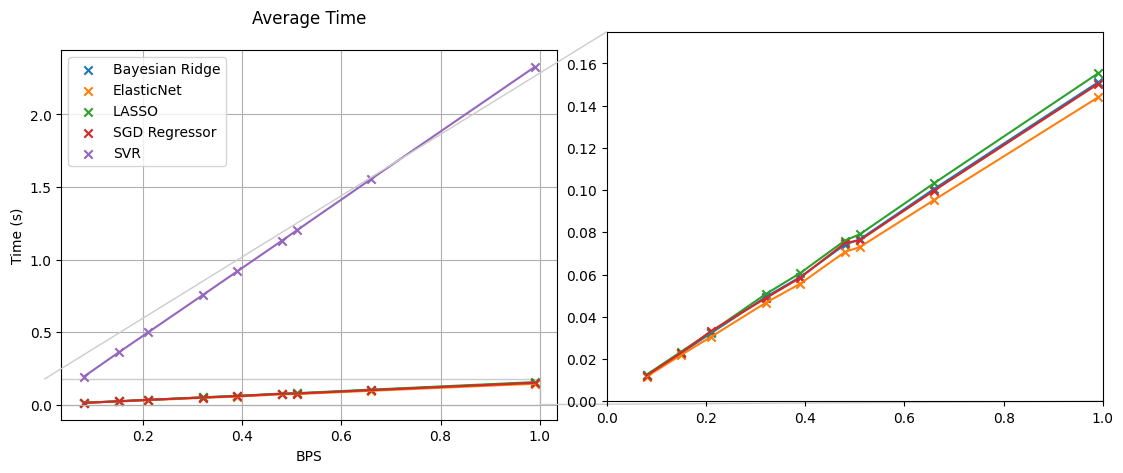

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes, mark_inset

fig, ax = plt.subplots()

ax.grid()
ax.set_xlabel('BPS')
ax.set_ylabel('Time (s)')
ax.set_title(f'Average Time')

axins = ax.inset_axes(
    [1.1, 0.05, 1, 1],
    xlim=(0., 1.), ylim=(0, 0.175)
)
# ax.indicate_inset_zoom(axins)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.8")

grouped_df = mean_by_time.groupby('model_name')

# Plot line chart
for name, group in grouped_df:
    ax.plot(group['secret_bps'], group['time'])
    ax.scatter(group['secret_bps'], group['time'],
                marker='x', label=name)
    
    axins.plot(group['secret_bps'], group['time'])
    axins.scatter(group['secret_bps'], group['time'],
                marker='x')

ax.legend(loc='upper left')
plt.title('Average Time')
plt.show()

In [ ]:
new_mean_by_time = mean_by_time.groupby(
    ['model_name'])['time'].mean()
new_mean_by_time.reset_index()

,model_name,time
0,Bayesian Ridge,0.064196
1,ElasticNet,0.061023
2,LASSO,0.065998
3,SGD Regressor,0.064075
4,SVR,0.993323
